# 1.1 - Movielens full - EDA

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Path to data
movies='movies.csv'
ratings='ratings.csv'

# Read data and define data types
df_movies=pd.read_csv(movies, usecols=['movieId', 'title'], dtype={'movieId':'int32','title':'str'}) 
df_ratings=pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float'})

# Display the first few rows of each DataFrame
print("First few rows of movies DataFrame:")
print(df_movies.head())
print("\nFirst few rows of ratings DataFrame:")
print(df_ratings.head())

First few rows of movies DataFrame:
   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)

First few rows of ratings DataFrame:
   userId  movieId  rating
0       1        1     4.0
1       1      110     4.0
2       1      158     4.0
3       1      260     4.5
4       1      356     5.0


# A) Exploratory Data Analysis on movies and ratings data

86537
330975


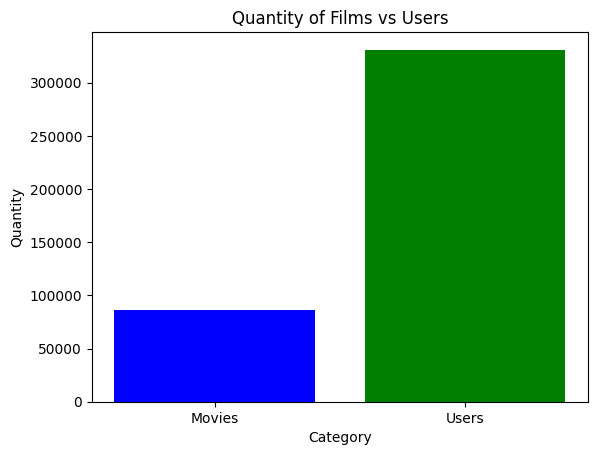

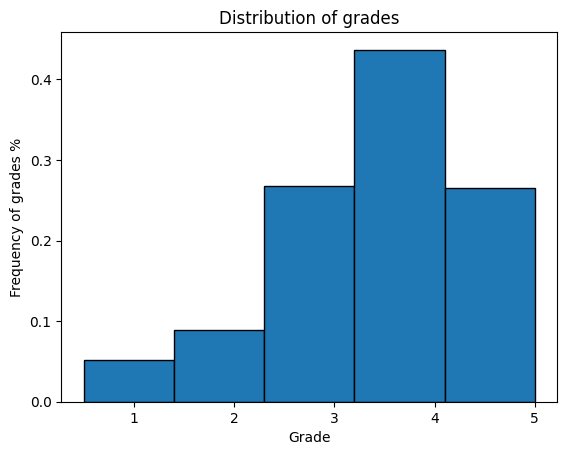

In [56]:
# Quantity of films and users
num_movies=df_movies['movieId'].nunique()
num_users=df_ratings['userId'].nunique()
print(num_movies)
print(num_users)

# Quantity of movies vs users in bar plot
plt.bar(['Movies', 'Users'], [num_movies, num_users], color=['blue', 'green'])
plt.title('Quantity of Films vs Users')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

# Distribution of grades
plt.hist(df_ratings['rating'], bins=5, edgecolor='black', density=True)  # Uppdaterad med density=True
plt.title('Distribution of grades')
plt.xlabel('Grade')
plt.ylabel('Frequency of grades %')
plt.xticks(range(1, 6))
plt.show()

# B) Sort top 10 movies with the most ratings 

In [59]:
# Group ratings by movieId and count the number of ratings for each movie
ratings_per_movie = df_ratings.groupby('movieId').size()

# Sort movies by the number of ratings in descending order and take the top 10
top_10_movies = ratings_per_movie.sort_values(ascending=False).head(10)

# Fetch the title for each movie from df_movies
top_10_movies_with_titles = top_10_movies.rename(index=df_movies.set_index('movieId')['title'])

# Print top 10 movies with the most ratings
#print(top_10_movies)
print(top_10_movies_with_titles)

movieId
Shawshank Redemption, The (1994)                         122296
Forrest Gump (1994)                                      113581
Pulp Fiction (1994)                                      108756
Matrix, The (1999)                                       107056
Silence of the Lambs, The (1991)                         101802
Star Wars: Episode IV - A New Hope (1977)                 97202
Fight Club (1999)                                         86207
Schindler's List (1993)                                   84232
Jurassic Park (1993)                                      83026
Star Wars: Episode V - The Empire Strikes Back (1980)     80200
dtype: int64


# C) Calculate the average rating for the top 10 movies.

In [61]:
# Calculate the total sum of ratings for the top 10 movies
total_ratings_top_10_movies = top_10_movies.sum()

# Calculate the average of the total ratings by dividing the total sum by 10.
average_rating_top_10_movies = total_ratings_top_10_movies / len(top_10_movies_with_titles)

print("Average of the total ratings for the top 10 movies:", average_rating_top_10_movies)

Average of the total ratings for the top 10 movies: 98435.8
